___
![la](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSIrOvb3w0tnozDFFNB9SjPbIPcQbw6HQZYew&usqp=CAU)
____

In [1]:
# usual imports....
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

____

Your goal is to take a small dataset at a few points/measurements and make predictions of the output at any point. We'll make fake data so that you can compare your prediction with the ground truth. In the next code cell are some functions for making fake data. Note that the data lives in 2D: there are two inputs and one output. 
____

**IMPORTANT:** I left some helper code at the bottom of this notebook. Feel free to completely ignore it. Or, use it as inspiration if you get stuck. As usual, if you do use my code, comment it and ensure it is PEP-8 compliant.

____

In [2]:
# define functions to generate fake data

def surface_1(x, y):
  return np.exp(-(x**2 + y**2))

def surface_2(x, y):
  return np.sin(x)*np.cos(y)

# Aditya
def surface_3(x, y):
  return np.sin(x)**2 - np.cos(y)**2
# Anna
def surface_4(x, y):
  return (np.sin(x*y))+y
# Angelica
def surface_5(x, y):
  return np.sqrt(x**2 + y**2)


Add your own functions to the code cell above. Each person in your group should invent one function. Add a comment to each function with the name of the person who designed that function. 

Next, open a code cell below and plot the functions. You probably want to use `meshgrid` because we are in 2D. Looking at the answer like this is really cheating, but you can get a sense for what the RBF-NN is trying to achieve by making this visualization; moreover, you can then vary the number of data points (below) to see how many you need to match this ground truth. 

For your final plot, you make a single row of three plots (e.g., `subplots`): 
1. the data,
2. the interpolation,
3. the ground truth.

You might start organizing your plot(s) now. 


In [96]:
# make fake data

num_points = 250 # vary this # Taking 250 data points to train our model well. 
data_range = 5 # you may need to vary this to see your function properly

x_data = data_range*(np.random.random(num_points) - 0.5)
y_data = data_range*(np.random.random(num_points) - 0.5)
z_data = surface_3(x_data, y_data) # vary this; also, you need to pick L for this to work

Text(0.5, 1.0, '(Fake) Raw Data')

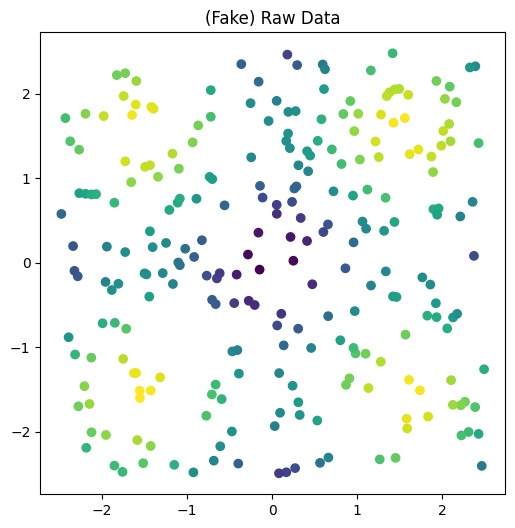

In [97]:
plt.figure(figsize=(6,6))
plt.scatter(x_data, y_data, c=z_data)
plt.title("(Fake) Raw Data")

Text(0.5, 1.0, 'Ground Truth')

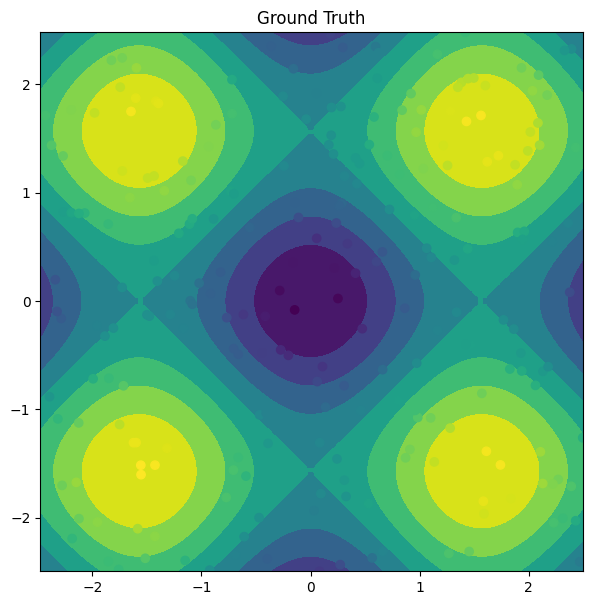

In [98]:
# Analysing the ground truth 
xx, yy = np.meshgrid(np.linspace(-3,3, 100), np.linspace(-3,3,100))
f, a1 = plt.subplots(ncols=1, nrows=1, figsize=(7,7))
a1.contourf(xx, yy, surface_3(xx, yy))
a1.scatter(x_data, y_data, c=z_data)
a1.set_xlim(np.min(x_data),np.max(x_data))
a1.set_ylim(np.min(y_data),np.max(y_data))
a1.set_title("Ground Truth")

We wish to create a model trained on this data that allows us to predict what we think the real function is.  Recall that this is called "regression": using data to predict a function that we can evaluate everywhere. 

To not introduce too many new ideas, let's work with RBF-NNs. (It doesn't really matter what basis functions you use, so feel free to use many!) Thus, our model will be:

$$z(x,y) = \sum_{d=1}^{N_d} w_d e^{-\left((x - x_d)^2 + (y - y_d)^2\right)/L^2}.$$

The $d$ sum is over the $N_d$ data points in the plot you just made. Note that you have $N_d$ values of $x$, $y$ and $z$. Thus, there are $N_d$ weights: we can make $N_d$ equations in $N_d$ unknowns - a classic linear algebra problem! Once you have this working, you can make $N_d$ quite large and you will understand the benefit of linear algebra. 

The more data points you have, the more terms in the sum and the richer your prediction can be.

____

Ok, we need to deal with $L$. If we want to vary $L$ as we fit the data, we will not have a linear algebra problem anymore. We would need to use a minimization/optimization approach. Since we are doing linear algebra this week, we will simply guess a reasonable value for $L$. Let's use:

In [99]:
# L = np.mean(np.abs(np.diff(x_data)))*0.1
# L = (np.mean(np.abs(np.diff(x_data))) + np.mean(np.abs(np.diff(y_data))))*0.000001 # check to see what happens if this is too small
L = 2*np.std(x_data)**2*0.1

What is this doing? Can you think of better choices? 

📝 **Answer**

* The above code calculates the absolute mean difference between the values of x axis 
* An alternate assignment could be two times the value of variance, that is square of standard deviation.
* When L is very small the value of radial basis function results to zero, providing no weights in the situation.

It comes out, the alternate choice provides a better fitting of weights. 
____

Write a function that computes $z$ (from the formula above) and plots it - once you know the weights $w_d$, you will need this function to make the final plot(s). Think through what the inputs and output of this function need to be. To test the code, use any values of the $w_d$. You can make a version of your final three-panel plot. 

For example, set the weights to one, $w_d = 1$, and get all of the visualizations completed: data points, prediction, ground truth.

At this point, you should have everything working: _we just need the weights._

_____

Solve for the weights using **two** approaches:
1. doing the linear algebra yourself - inverting a matrix and doing the relevant matrix multiplications,
2. using `solve`, which directly solves a linear matrix equation. 

As described above, compare with the ground truth. Vary the number of data points in the fake data to see what it takes to get close to the ground truth. Vary the way you make the fake data: are some functions harder to approximate than others? That is, do they need more data? Finally, vary $L$ (e.g., mulitply it by $1/10$ or $10$)) to see if our estimate was a good one. 

I recommend writing some practice code for a problem you already know the answer to. Then, it is simply a matter of using the data you generated above in the correct array shape to get your result. 


____

**HELPER CODE**
____

In [100]:
# use a double list comprehension to compute the values of the basis functions
# We are calculating radial basis function values using our raw fake data. 
# The double list comprehension helps us to avoid writing traditional multiple for loops.
K = [[np.exp(-(x - xx)**2/L**2-(y - yy)**2/L**2) for x, y in zip(x_data, y_data)] for xx, yy in zip(x_data, y_data)]

In [101]:
weights = np.ones(num_points)

In [104]:
# Generating small amount of data points to test our prediction model. 
num_points = 20
data_range = 5 

X = data_range*(np.random.random(num_points) - 0.5)
Y = data_range*(np.random.random(num_points) - 0.5)
Z = surface_3(X, Y) 

Text(0.5, 1.0, 'Ground Truth')

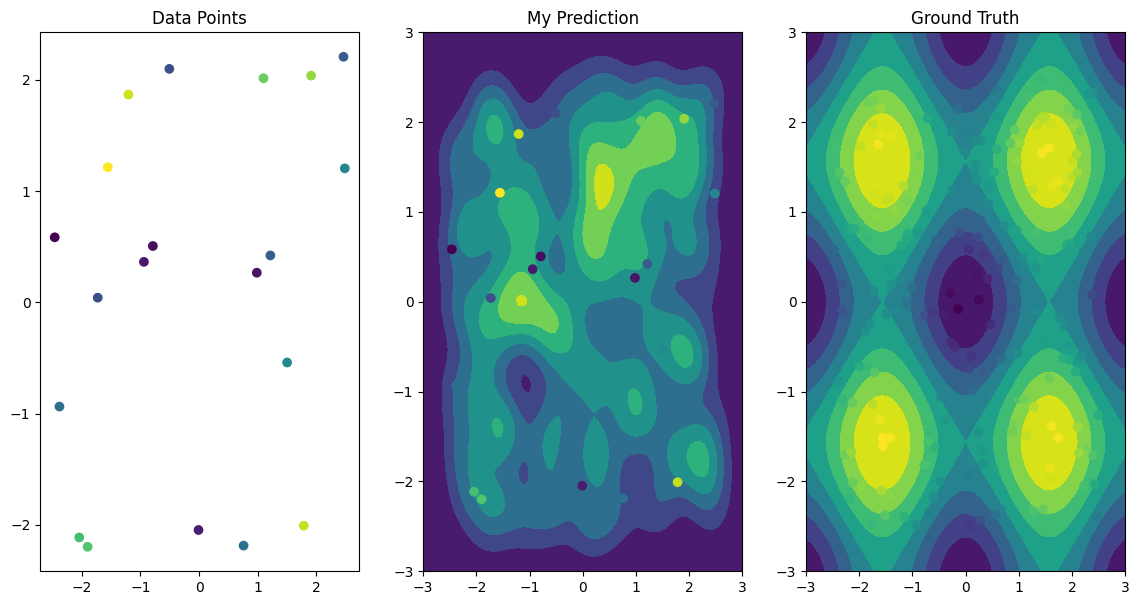

In [105]:
# plot prediction, given the weights are set to one.

# Function for predicting the values using derived weights and L value. 
def my_prediction(x, y, weights, x_data, y_data, L):

    z = 0
    for w, x_d, y_d in zip(weights, x_data, y_data):
      z+= w*np.exp((-(x-x_d)**2 - (y-y_d)**2)/L**2)

    return z

xx, yy = np.meshgrid(np.linspace(-3,3, 100), np.linspace(-3,3,100))

# plt.figure(figsize=(7,7))
f, (a0, a1, a2) = plt.subplots(ncols=3, nrows=1, figsize=(14,7))
a0.scatter(X,Y,c=Z)
a0.set_title("Data Points")
a1.contourf(xx,yy, my_prediction(xx,yy, weights, x_data, y_data, L))
a1.scatter(X, Y, c=Z)
a1.set_title("My Prediction")
a2.contourf(xx, yy, surface_3(xx, yy))
a2.scatter(x_data, y_data, c=z_data)
a2.set_title("Ground Truth")

In [106]:
# invert matrix and do matrix-vector multiplication
# weights_1 = linalg.inv(K).dot(z_data) # one option
# The first way to calculate weights by using inverse matrix method. 
# Here we are solving the equatin directly by taking the inverse and applying the dot product.
weights_1 = linalg.inv(K)@z_data # another option

In [107]:
# solve the linear system directly with solve
# In Method 2 .solve performs the operation for us and provides the weight matrix 
weights_2 = np.linalg.solve(K,z_data)

In [108]:
# do these two approaches give the same answer?!
# Approximately (To the power -14 which can be considered equal) or exactly equal. 
print(weights_1 - weights_2)

[ 3.59712260e-14  8.57647287e-14  1.02695630e-14 -2.20379270e-14
  5.04327483e-14  1.13797860e-15  2.10248485e-15  5.57887070e-15
  4.10782519e-15  9.99200722e-15 -1.86656246e-15  1.72084569e-15
  3.14748227e-14  2.17048601e-14 -2.22044605e-16 -4.53803661e-15
  7.61890551e-14 -6.99440506e-15 -9.99200722e-16  1.90646110e-15
 -5.10702591e-15 -2.49800181e-16  2.22044605e-16  4.99600361e-15
 -1.72639680e-14  1.49880108e-15 -3.58602037e-14  2.44915199e-13
 -1.44675938e-15  4.57966998e-16  2.48412402e-14 -3.91353616e-15
  1.66533454e-15  1.60566005e-14  6.59472477e-14 -1.11022302e-15
 -2.77555756e-16 -9.86016824e-15  2.05391260e-15 -2.16493490e-15
  2.90860669e-11 -7.57727214e-14  2.86437540e-14  5.46784840e-15
 -4.80726570e-14  2.27484698e-13 -1.62189706e-13 -5.66213743e-15
 -1.33226763e-14  3.99680289e-15 -4.72399897e-14  5.87030424e-15
 -1.07136522e-14 -3.99680289e-14 -1.31422651e-14 -1.25476018e-13
  4.92661467e-15  2.53529836e-14  2.48412402e-15  3.17856852e-13
  2.70894418e-14 -7.77156

Text(0.5, 1.0, 'Ground Truth')

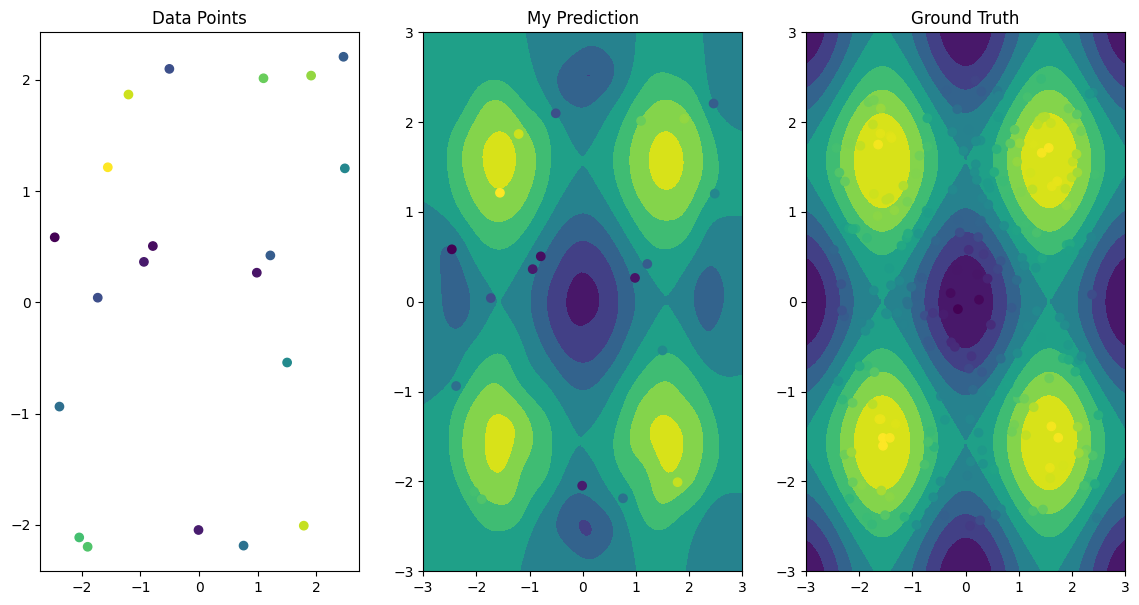

In [109]:
xx, yy = np.meshgrid(np.linspace(-3,3, 100), np.linspace(-3,3,100))

# plt.figure(figsize=(7,7))
f, (a0, a1, a2) = plt.subplots(ncols=3, nrows=1, figsize=(14,7))
a0.scatter(X,Y,c=Z)
a0.set_title("Data Points")
a1.contourf(xx,yy, my_prediction(xx,yy, weights_1, x_data, y_data, L))
# a1.set_xlim(np.min(X),np.max(X))
# a1.set_ylim(np.min(Y),np.max(Y))
a1.scatter(X, Y, c=Z)
a1.set_title("My Prediction")
a2.contourf(xx, yy, surface_3(xx, yy))
a2.scatter(x_data, y_data, c=z_data)
# a2.set_xlim(np.min(x_data),np.max(x_data))
# a2.set_ylim(np.min(y_data),np.max(y_data))
a2.set_title("Ground Truth")

📝 **Answers**

* Varying the data points in fake data helps us estimate a good weight for out algorithm. The more data points we have the better our prediction becomes.
* Some function are harder to approximate than others, and by providing more data points we are able to get better prediction results. 
* L plays an important role as it has the potential to disrupt all our predictions if the value is not selected properly. 
* When large value of L is used, prediction algorithm required more data, and even no matter how much we increase our fake training data, accuracy might still remain low.
* Using 2 times variance value as L required less training data to estimate weights, and provided better prediction accuracy on small data sets ranging 20-30 data points. 

------

<center>Thank You!